In [1]:
from helpers import load_csv_data
from implementations import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_folder = 'C:/Users/ACER/OneDrive - epfl.ch/Desktop/ML/dataset/'
x_train, x_test, y_train, train_ids, test_ids, train_columns, test_columns = load_csv_data(data_folder, sub_sample=True)

In [3]:
x_train.shape, x_test.shape, y_train.shape


((500, 321), (500, 321), (500,))

## Test of the algorithms on a linear regression between 2 features

Weights from GD:  [-9.03146439e+63 -7.18121629e+64]
Weights from SGD:  [nan nan]
Weights from LS:  [798287.38193225 926778.89981154]


c:\Users\ACER\OneDrive - epfl.ch\Desktop\ML\MilaLyon\implementations.py:119: RuntimeWarning: overflow encountered in matmul
  w -= gamma * tx[random_index] * (tx[random_index] @ w - y[random_index])
c:\Users\ACER\OneDrive - epfl.ch\Desktop\ML\MilaLyon\implementations.py:119: RuntimeWarning: invalid value encountered in subtract
  w -= gamma * tx[random_index] * (tx[random_index] @ w - y[random_index])


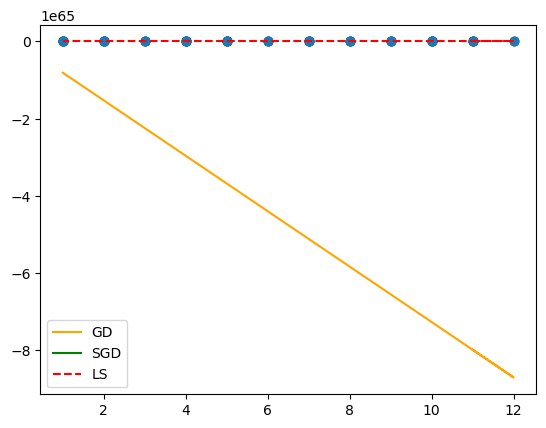

In [4]:
# We observe that features 1 and 2 are correlated
# Let's test our algorithms on these two features only

import numpy as np
from matplotlib import pyplot as plt
from implementations import mean_squared_error_gd, mean_squared_error_sgd, least_squares

tx = np.ones((x_train.shape[0], 2))
tx[:, 1] = x_train[:, 1]

w_gd, _ = mean_squared_error_gd(x_train[:,2], tx, np.array([0., 0.]), max_iters=100, gamma=0.1)
w_sgd, _ = mean_squared_error_sgd(x_train[:,2], tx, np.array([0., 0.]), max_iters=10000, gamma=0.1)
w_ls, _ = least_squares(x_train[:,2], tx)

print("Weights from GD: ", w_gd)
print("Weights from SGD: ", w_sgd)
print("Weights from LS: ", w_ls)

plt.scatter(x_train[:, 1], x_train[:, 2], alpha=0.2)
plt.plot(x_train[:, 1], tx @ w_gd, label='GD', color='orange')
plt.plot(x_train[:, 1], tx @ w_sgd, label='SGD', color='green')
plt.plot(x_train[:, 1], tx @ w_ls, label='LS', color='red', linestyle='dashed')
plt.legend()

# Preprocessing


Dealing with NaN values, correlated columns, categoric variable.
Handle outliers, encode categorical, feature normalization.


In [5]:
non_nan_mask = ~np.isnan(x_train).any(axis = 0)
non_nan_indices = np.where(non_nan_mask)[0]

print("Indices of features with no NaN values:", non_nan_indices)
print("Number of features without NaNs out of 321:", non_nan_mask.sum())

Indices of features with no NaN values: [  0   1   2   3   4   5   6   7   8  26  27  28  30  31  32  33  34  36
  39  40  42  43  44  45  46  47  48  50  51  52  53  57  58  59 216 217
 219 220 221 222 227 229 230 231 232 233 235 236 237 239 240 241 242 243
 244 246 247 248 249 255 256 257 258 259 260 261 262 263 264 265 272 273
 274 275 278 279 280 281 282 283 284 287 288 298 305 306 307 308 309 310
 311 312 316 317]
Number of features without NaNs out of 321: 94


### Mean Imputation

In [6]:
x_train_imp, x_test_imp = mean_imputation(x_train, x_test, train_columns)


Dropped columns (all NaN): ['CCLGHOUS', 'ASATTACK', 'ASERVIST', 'ASDRVIST', 'ASRCHKUP', 'ASACTLIM', 'ASYMPTOM', 'ASNOSLEP', 'ASTHMED3', 'ASINHALR', 'PCPSADE1', 'PCDMDECN']
New shape after mean imputation: (500, 309)


In [7]:
non_nan_mask = ~np.isnan(x_train_imp).any(axis = 0)
non_nan_indices = np.where(non_nan_mask)[0]

print("Indices of features with no NaN values:", non_nan_indices)
print("Number of features without NaNs out of 321:", non_nan_mask.sum())
print("Number of dropped features", 321- non_nan_mask.sum())

Indices of features with no NaN values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 23

In [8]:
x_train, x_test = normalize(x_train_imp, x_test_imp)

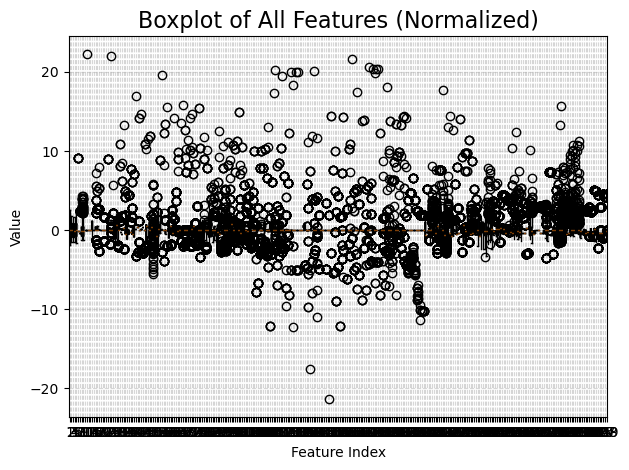

In [9]:
# Make boxplot with colors
box = plt.boxplot(x_train, patch_artist=True, notch=True, widths=0.6)



# Labels
plt.title("Boxplot of All Features (Normalized)", fontsize=16)
plt.xlabel("Feature Index")
plt.ylabel("Value")

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


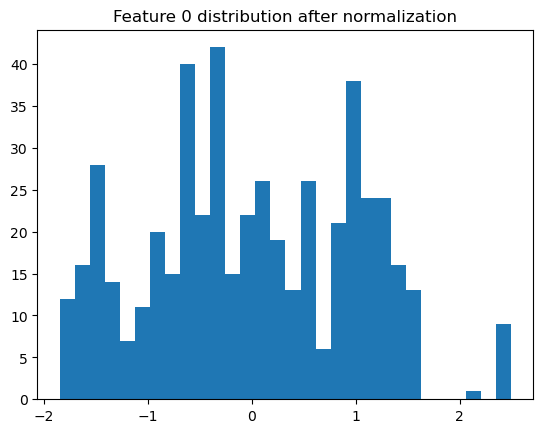

In [10]:
plt.hist(x_train[:, 0], bins=30)
plt.title("Feature 0 distribution after normalization")
plt.show()


c:\Users\ACER\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\ACER\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Text(0, 0.5, 'Features')

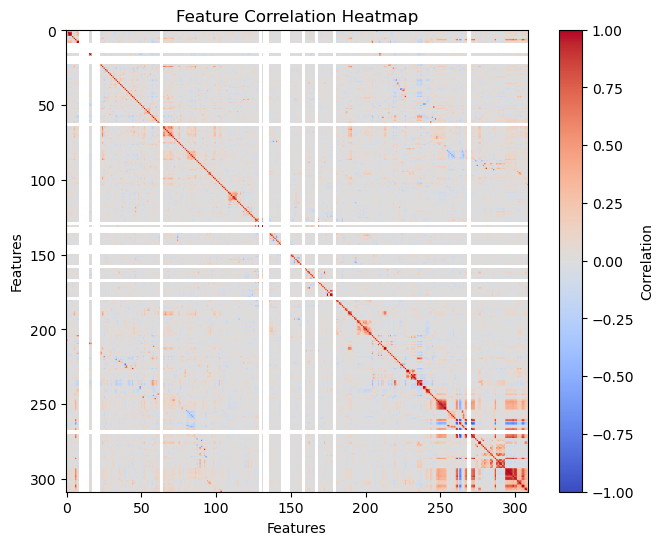

In [11]:
corr_matrix = np.corrcoef(x_train, rowvar=False)  # shape (D, D)

# Step 2: Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.title("Feature Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")



In [13]:
threshold = 0.9
high_corr_pairs = []

for i in range (corr_matrix.shape[0]):
    for j in range (i+1, corr_matrix.shape[0]):
        if abs(corr_matrix[i,j]) > threshold:
            high_corr_pairs.append((i,j))
            
            print(f"Features {train_columns[i]} and {train_columns[j]} have correlation {corr_matrix[i,j]:.2f}")
    

Features _STATE and ADDOWN have correlation 1.00
Features FMONTH and IDATE have correlation 0.93
Features FMONTH and IMONTH have correlation 0.93
Features IDATE and IMONTH have correlation 1.00
Features SEQNO and _PSU have correlation 1.00
Features CVDSTRK3 and _CHISPNC have correlation -1.00
Features MARITAL and _RACE_G1 have correlation 0.99
Features EXEROFT2 and _FRT16 have correlation 0.91
Features PNEUVAC3 and _PA300R2 have correlation 0.99
Features VIREDIF3 and VINOCRE2 have correlation 0.92
Features VIREDIF3 and VIEYEXM2 have correlation 0.92
Features VINOCRE2 and VIEYEXM2 have correlation 1.00
Features ARTTODAY and HADPAP2 have correlation 0.91
Features HPVTEST and HADHYST2 have correlation 1.00
Features HPVTEST and PROFEXAM have correlation 1.00
Features HADHYST2 and PROFEXAM have correlation 1.00
Features ADSLEEP and ADEAT1 have correlation 0.95
Features ADTHINK and ADMOVE have correlation 1.00
Features _STSTR and _LTASTH1 have correlation 0.95
Features _DUALUSE and _DUALCOR 